<a href="https://www.kaggle.com/code/maryamkamelan/online-retail-unsupervisedlearning?scriptVersionId=204385662" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('/kaggle/input/online-retail/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


It seems we have null values in CustomerID column; so we have to omit them as they do not contain any important information.

In [4]:
data = data[data['CustomerID'].notnull()]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
# Group transactions by CustomerID and aggregate StockCode into lists
transactions = data.groupby('CustomerID')['StockCode'].apply(list)

# Convert transactions to lists of lists of strings
transactions_list = transactions.apply(lambda x: [str(i) for i in x]).tolist()

# Use MultiLabelBinarizer to transform lists of lists into binary matrix
mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(transactions_list)

# Create DataFrame from binary matrix
stock_codes_by_customer = pd.DataFrame(binary_matrix, columns=mlb.classes_, index=transactions.index)

stock_codes_by_customer.head()

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(stock_codes_by_customer)

# Add cluster labels to the DataFrame
KmeansClustered = stock_codes_by_customer.copy()
KmeansClustered['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
KmeansClustered.head(10)

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST,Cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
12353.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
12354.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
12355.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [8]:
# Perform KNN Classification
# Split the data into features (X) and target (y)
X = KmeansClustered.drop(columns=['Cluster'])  # Features
y = KmeansClustered['Cluster']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)  # We can adjust the number of neighbors as needed

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test.values)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7400914634146342
Precision: 0.5635232527783993
Recall: 0.7400914634146342
F1-score: 0.6310825203761884


As we can see, the classification results are very poor; so let's find the optimal K for clustering and do it again. 

<Axes: >

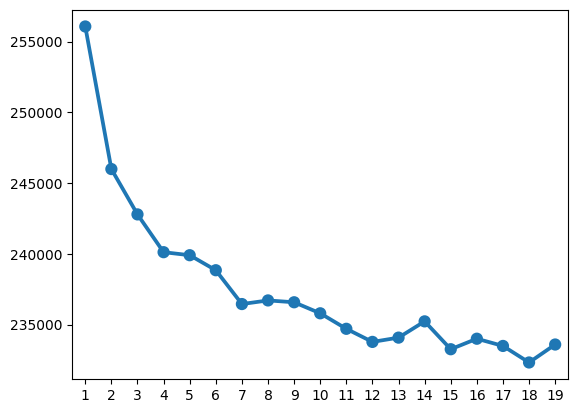

In [9]:
wcss = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(stock_codes_by_customer)
    wcss[k] = kmeans.inertia_
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))

I choose k=6 as the elbow part of the plot.

In [10]:
# Perform K-means clustering by the optimum k=6
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(stock_codes_by_customer)

# Add cluster labels to the DataFrame
KmeansClustered = stock_codes_by_customer.copy()
KmeansClustered['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
KmeansClustered.head(20)

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST,Cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,4
12353.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12354.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12355.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


Performing the knn classification again with the new clustering:

In [11]:
# Split the data into features (X) and target (y)
X1 = KmeansClustered.drop(columns=['Cluster'])  # Features
y1 = KmeansClustered['Cluster']  # Target

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)  
# We can adjust the number of neighbors as needed but here changing the n does not make any considerable change in results

# Train the classifier on the training data
knn.fit(X1_train, y1_train)

# Predict the labels for the test data
y1_pred = knn.predict(X1_test.values)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y1_test, y1_pred, average='weighted')
recall = recall_score(y1_test, y1_pred, average='weighted')
f1 = f1_score(y1_test, y1_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7474285714285714
Precision: 0.5618600985221675
Recall: 0.7474285714285714
F1-score: 0.6414938132733408


$$$ The results have improved slightly but are still far from the permissible value! let's perform DBscan too:

In [12]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Adjust eps and min_samples
cluster_labels = dbscan.fit_predict(stock_codes_by_customer)

# Add cluster labels to the DataFrame
DBscanClustered = stock_codes_by_customer.copy()
DBscanClustered['DBSCAN_Cluster'] = cluster_labels

# Display the DataFrame with DBSCAN cluster labels
DBscanClustered.head(10)

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST,DBSCAN_Cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,-1
12353.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
12354.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
12355.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


As we can see clustering has detected almost all the data as outlier! Adjusting eps and min_samples does not change the result. 

In [13]:
# Split the data into features (X) and target (y)
X2 = DBscanClustered.drop(columns=['DBSCAN_Cluster'])  # Features
y2 = DBscanClustered['DBSCAN_Cluster']  # Target

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the classifier on the training data
knn.fit(X2_train, y2_train)

# Predict the labels for the test data
y2_pred = knn.predict(X2_test.values)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y2_test, y2_pred, average='weighted')
recall = recall_score(y2_test, y2_pred, average='weighted')
f1 = f1_score(y2_test, y2_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.96
Precision: 0.9989206349206349
Recall: 0.96
F1-score: 0.9785688037958293


$$$ We get a much better scores here but they are not reliable because the clustering has not performed well.

Now let's get use of the 'Quantity' column and with method BoP, let's create a data frame that shows the number of products purchased in each column.

In [14]:
# Group by CustomerID and StockCode and calculate the sum of quantity for each stock for each customer
customer_stock_quantity = data.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().reset_index()

# Pivot the DataFrame to create a new DataFrame with CustomerID as rows and StockCode as columns
pivot_table = customer_stock_quantity.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Print the new DataFrame
pivot_table.head(10)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
12353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12355.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pivot_table.columns = pivot_table.columns.astype(str)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(pivot_table)

# Add cluster labels to the DataFrame
KmeansClusteredSum = pivot_table.copy()
KmeansClusteredSum['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
KmeansClusteredSum.head(50)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST,Cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0
12353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12355.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


As it can be observed, all the data are grouped in one cluster! First, we check if the data frame is made correctly or not. For this purpose, we calculate and compare the values of a cell manually:

In [16]:
pivot_table.loc[17850.0, '85123A']

122.0

In [17]:
customer_id = 17850.0  # Replace with the desired customer ID
stock_code = '85123A'  # Replace with the desired stock code

# Filter the DataFrame for the specified customer ID and stock code in different invoice numbers
filtered_df = data[(data['CustomerID'] == customer_id) & (data['StockCode'] == stock_code)]

# Group by invoice number and sum the quantities for each invoice
invoice_sums = filtered_df.groupby('InvoiceNo')['Quantity'].sum()

# Count the number of different invoices
num_invoices = len(invoice_sums)

# Calculate the total quantity across all invoices
total_quantity = invoice_sums.sum()

# Print the results
print("Number of different invoices:", num_invoices)
print("Total quantity for customer ID {} and stock code {}: {}".format(customer_id, stock_code, total_quantity))

Number of different invoices: 17
Total quantity for customer ID 17850.0 and stock code 85123A: 122


It seems that the dataframe has been created correctly. Now we may have to normalize the data as a preprocessing and perform clustering again.

In [18]:
# Initialize the Normalizer object
normalizer = Normalizer(norm='l2')

# Apply L2 normalization scaling to the pivot table data
scaled_data = normalizer.fit_transform(pivot_table)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=pivot_table.columns, index=pivot_table.index)

# Display the scaled DataFrame
scaled_df

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016015
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.010561
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.019668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [19]:
scaled_df.columns = scaled_df.columns.astype(str)

# Perform K-means clustering....I test n by different numbers and n=5 is the best
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
KmeansClusteredSumScaled = scaled_df.copy()
KmeansClusteredSumScaled['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
KmeansClusteredSumScaled.head(50)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST,Cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016015,0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010561,0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019668,0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098543,0
12353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
12354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
12355.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0


In [20]:
# Split the data into features (X) and target (y)
X3 = KmeansClusteredSumScaled.drop(columns=['Cluster'])  # Features
y3 = KmeansClusteredSumScaled['Cluster']  # Target

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # I adjusted the number of neighbors and find an almost best n

# Train the classifier on the training data
knn.fit(X3_train, y3_train)

# Predict the labels for the test data
y3_pred = knn.predict(X3_test.values)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y3_test, y3_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y3_test, y3_pred, average='weighted')
recall = recall_score(y3_test, y3_pred, average='weighted')
f1 = f1_score(y3_test, y3_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8468571428571429
Precision: 0.8672531645569621
Recall: 0.8468571428571429
F1-score: 0.8178309464904395


The results are improved but still far from the perfect classification. let's draw elbow curve and calculate silhouette score to find a more precised optimum k for the normalized dataframe.

In [ ]:
# Define a range of values for k
k_values = range(2, 30) 

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Iterate over each value of k
for k in k_values:
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the data
    kmeans.fit(scaled_df)
    
    # Calculate inertia (within-cluster sum of squares)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

I changed the k interval several times but i can not find the elbow part of the plot. so it does not help me in finding the optimum k and I chose the k for clustering manually in the previous code cells.

In the following, we will perform the PCA operation so that maybe we can get better results by reducing the dimensions of the problem.

In [ ]:
# Apply PCA
pca = PCA()
pca.fit(scaled_df)

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance ratio to decide on the number of components
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
# Choosing the number of components based on the plot. I chose 1000 as it is properly more than 90%
n_components = 1000

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_df)

# Convert the PCA transformed data into a DataFrame
pca_data_df = pd.DataFrame(pca_data)
pca_data_df.head()

In [ ]:
# Perform K-means clustering....I test n by different numbers and n=5 is the best
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data_df)

# Add cluster labels to the DataFrame
KmeansClusteredPCA = pca_data_df.copy()
KmeansClusteredPCA['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
KmeansClusteredPCA.head(50)

In [ ]:
X4 = KmeansClusteredPCA.drop(columns=['Cluster'])  # Features
y4 = KmeansClusteredPCA['Cluster']  # Target

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X4_train, y4_train)
y4_pred = knn.predict(X4_test)
accuracy = accuracy_score(y4_test, y4_pred)
precision = precision_score(y4_test, y4_pred, average='weighted')
recall = recall_score(y4_test, y4_pred, average='weighted')
f1 = f1_score(y4_test, y4_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Our result has not improved; maybe because we lose important data from omitted columns that we didn't consider a logical way to delete them.

Now it is time to perform DBScan on the l2norm scaled data that we named it "scaled_df" before.

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Adjust eps and min_samples as needed
cluster_labels2 = dbscan.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
DBscanClustered2 = scaled_df.copy()
DBscanClustered2['DBSCAN_Cluster'] = cluster_labels2

# Display the DataFrame with DBSCAN cluster labels
DBscanClustered2.head(100)

Again we get an awful result of noises...here we try to find optimum eps and min samples by silhouette score:

In [ ]:
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(1, 11)

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over different values of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Fit DBSCAN to your data
        dbscan.fit(scaled_df)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(scaled_df, dbscan.labels_)
        silhouette_scores.append((eps, min_samples, silhouette_avg))

# Extract eps, min_samples, and silhouette scores
eps_values = [score[0] for score in silhouette_scores]
min_samples_values = [score[1] for score in silhouette_scores]
silhouette_scores = [score[2] for score in silhouette_scores]

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.scatter(eps_values, min_samples_values, c=silhouette_scores, cmap='viridis')
plt.colorbar(label='Silhouette Score')
plt.xlabel('Eps')
plt.ylabel('Min Samples')
plt.title('Silhouette Score for Different Values of Eps and Min Samples')
plt.grid(True)
plt.show()

In [ ]:

# Chosen values of eps
eps_values = [0.1,0.2,0.3,0.4, 0.5,0.6]

# Define the range of values for min_samples
min_samples_values = range(1, 11)

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over different values of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Fit DBSCAN to your data
        dbscan.fit(scaled_df)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(scaled_df, dbscan.labels_)
        silhouette_scores.append((eps, min_samples, silhouette_avg))

# Filter silhouette scores for each chosen eps value
for eps in eps_values:
    # Extract silhouette scores for the current eps value
    scores_for_eps = [score[2] for score in silhouette_scores if score[0] == eps]
    
    # Plot min_samples values vs silhouette scores for the current eps
    plt.plot(min_samples_values, scores_for_eps, label=f'eps={eps}')

# Add labels and legend
plt.xlabel('Min Samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of Min Samples for Chosen Eps')
plt.legend()
plt.grid(True)
plt.show()

As shown in the both diagrams, performing DBSCAN does not have a good results on the BoP method for this dataset.

In [ ]:
X5 = DBscanClustered2.drop(columns=['DBSCAN_Cluster'])  # Features
y5 = DBscanClustered2['DBSCAN_Cluster']  # Target

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X5_train, y5_train)
y5_pred = knn.predict(X5_test)
accuracy = accuracy_score(y5_test, y5_pred)
precision = precision_score(y5_test, y5_pred, average='weighted')
recall = recall_score(y5_test, y5_pred, average='weighted')
f1 = f1_score(y5_test, y5_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

As a last attempt, since our manipulated dataframe is a sparse matrix, we select a number of products that have the highest sales number. For choosing the number of kept columns, different values were tested and the best value was around 50.

In [ ]:
# Calculate the sum of values for each column

stock_codes_top_50 =[]
column_sums = pivot_table.sum(axis=0)

# Sort the columns by their sum in descending order and select the top 50 columns
top_50_columns = column_sums.sort_values(ascending=False).head(50).index

# Select only the top 50 columns
stock_codes_top_50 = pivot_table[top_50_columns]

# Display the DataFrame with only the top 50 columns
stock_codes_top_50.head(50)

In [ ]:
# Initialize the Normalizer object
normalizer = Normalizer(norm='l2')

# Apply L2 normalization scaling 
scaled_data50 = normalizer.fit_transform(stock_codes_top_50)

# Convert the scaled data back to a DataFrame
scaled_df50 = pd.DataFrame(scaled_data50, columns=stock_codes_top_50.columns, index=stock_codes_top_50.index)

# Display the scaled DataFrame
scaled_df50

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels50 = kmeans.fit_predict(scaled_df50)

# Add cluster labels to the DataFrame
KmeansClustered50 = scaled_df50.copy()
KmeansClustered50['Cluster'] = cluster_labels50

# Display the DataFrame with cluster labels
KmeansClustered50.head(50)

In [ ]:
X6 = KmeansClustered50.drop(columns=['Cluster'])  # Features
y6 =KmeansClustered50['Cluster']  # Target

# Split the data into training and testing sets
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the classifier on the training data
knn.fit(X6_train, y6_train)

# Predict the labels for the test data
y6_pred = knn.predict(X6_test.values)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y6_test, y6_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y6_test, y6_pred, average='weighted')
recall = recall_score(y6_test, y6_pred, average='weighted')
f1 = f1_score(y6_test, y6_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=4)  # Adjust eps and min_samples as needed
cluster_labelsDB = dbscan.fit_predict(scaled_df50)

# Add cluster labels to the DataFrame
DBscanClustered50 = scaled_df50.copy()
DBscanClustered50['DBSCAN_Cluster'] = cluster_labelsDB

# Display the DataFrame with DBSCAN cluster labels
DBscanClustered50.head(50)

DBSCAN still detects so much noise in the dataset so the knn results can not be reliable.

In [ ]:
X7 = DBscanClustered50.drop(columns=['DBSCAN_Cluster'])  # Features
y7 =DBscanClustered50['DBSCAN_Cluster']  # Target

# Split the data into training and testing sets
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the classifier on the training data
knn.fit(X7_train, y7_train)

# Predict the labels for the test data
y7_pred = knn.predict(X7_test.values)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y7_test, y7_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y7_test, y7_pred, average='weighted')
recall = recall_score(y7_test, y7_pred, average='weighted')
f1 = f1_score(y7_test, y7_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

$$$ Let's add a new feature and calculate again...the new feature is the number of stocks each costumer has bought.

In [ ]:
# Add a new column to the DataFrame that contains the sum of stock codes for each customer
stock_codes_top_New = stock_codes_top_50.copy()
stock_codes_top_New['Number_of_Stocks'] = stock_codes_top_50.sum(axis=1)
stock_codes_top_New.head(100)

In [ ]:
# Initialize the Normalizer object
normalizer = Normalizer(norm='l2')

# Apply L2 normalization scaling 
scaled_dataNew = normalizer.fit_transform(stock_codes_top_New)

# Convert the scaled data back to a DataFrame
scaled_dfNew = pd.DataFrame(scaled_dataNew, columns=stock_codes_top_New.columns, index=stock_codes_top_New.index)

# Display the scaled DataFrame
scaled_dfNew.head(10)

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labelsNew = kmeans.fit_predict(scaled_dfNew)

# Add cluster labels to the DataFrame
KmeansClusteredNew = scaled_dfNew.copy()
KmeansClusteredNew['Cluster'] = cluster_labelsNew

# Display the DataFrame with cluster labels
KmeansClusteredNew.head()

In [ ]:
X8 = KmeansClusteredNew.drop(columns=['Cluster'])  # Features
y8 =KmeansClusteredNew['Cluster']  # Target

# Split the data into training and testing sets
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn0 = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the classifier on the training data
knn0.fit(X8_train, y8_train)

# Predict the labels for the test data
y8_pred = knn0.predict(X8_test.values)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y8_test, y8_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y8_test, y8_pred, average='weighted')
recall = recall_score(y8_test, y8_pred, average='weighted')
f1 = f1_score(y8_test, y8_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Here we can conclude that the total number of products bought by a customer is not very important but how many product group is selected is significant.

Let's check the min and max values of NumberOfStocks to become sure about the calculations:

In [ ]:
# Find the minimum value of the column
min_value = stock_codes_top_New['Number_of_Stocks'].min()

# Find the maximum value of the column
max_value = stock_codes_top_New['Number_of_Stocks'].max()

# Print the results
print("Minimum value:", min_value)
print("Maximum value:", max_value)

Here we see that we have negative values in the stocks number. it is a fault in dataframe! we should check how many rows have a negative false value

In [ ]:
negative_values = stock_codes_top_New[stock_codes_top_New['Number_of_Stocks'] < 0]

# Print the rows with negative values
print("Rows with negative values:")
print(negative_values)

It is just 3 rows...so we can ignore them! :D

**Determine the Minimum Number of Products: 

the minimum number of products needed to be bought by a new customer for accurate predictions depends on various factors such as the complexity of the data, the distribution of classes, the quality of features, and the nature of the problem. It's typically determined empirically through experimentation and validation.

I have used two methods for it... 

In [ ]:
# Define a function to prepare the dataset for a new customer with a specified number of products

def prepare_new_customer_data(num_products):
    # Select the top `num_products` stock codes
    top_products = KmeansClustered50.columns[:-1].values  # Exclude the last column (Cluster)
    
    # Create a new DataFrame for the new customer data
    new_customer_data = pd.DataFrame(columns=top_products)
    
    # Fill the DataFrame with zeros (assuming the customer hasn't bought any products yet)
    new_customer_data.loc[0] = np.zeros(len(top_products))
     
    # Assign a random quantity to each
    selected_products = np.random.choice(top_products, size=num_products, replace=False)
    for product in selected_products:
        new_customer_data.loc[0, product] = np.random.randint(1, 11)  # Random quantity between 1 and 10
    
    return new_customer_data
########################################################

# Split the data into features (X) and labels (y)
X = KmeansClustered50.drop(columns=['Cluster'])  # Features
y = KmeansClustered50['Cluster']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Train the classifier on the training data
knn_model.fit(X_train, y_train)

###################################################

# Define a range of values for the number of products
num_products_range = range(1, len(X.columns) + 1)  # Consider all possible products

stable_predictions = False
threshold_accuracy = 0.95  # Threshold for stability

# Iterate over the range of number of products
for num_products in num_products_range:
    # Prepare dataset with the chosen number of products
    new_customer_data = prepare_new_customer_data(num_products)
    
    # Predict the cluster for the new customer
    predicted_cluster = knn_model.predict(new_customer_data)
    predicted_cluster = np.repeat(predicted_cluster, len(y_test))  # Repeat the prediction for all test samples
    
    # Check if predictions are stable (i.e., accuracy is above the threshold)
    accuracy = accuracy_score(y_test, predicted_cluster)
    if accuracy >= threshold_accuracy:
        # Stable predictions achieved, record the number of products
        min_products_required = num_products
        stable_predictions = True
        break

# If stable predictions were not achieved, set min_products_required to the maximum number of products
if not stable_predictions:
    min_products_required = len(KmeansClustered50.columns) - 1

print("Minimum number of products required:", min_products_required)

In this method I made a whole zero Xtest and then add non zero values to it step by step until the evaluation metrics(here accuracy) reach the initial state(initial state is when we use 30% of the main data for test).

50 is the answer where stable predictions are not achieved. Let's examine another way;

In [ ]:
num_iterations =100

# Initialize a list to store the minimum number of non-zero features required
min_non_zero_features = []

# Iterate over a range of iterations
for _ in range(num_iterations):
    # Choose a random row index from X_test
    random_row_index = np.random.randint(len(X_test))
    random_row = X_test.iloc[random_row_index]

    # Initialize the number of non-zero features
    num_non_zero_features = np.count_nonzero(random_row)

    # Initialize a flag to indicate if a significant drop in accuracy is observed
    significant_drop = False

    # Iterate over each feature and set it to zero one by one
    for i, value in enumerate(random_row):
        if value != 0:
            # Incremental change: set the feature to zero
            random_row_modified = random_row.copy()
            random_row_modified[i] = 0

            # Predict labels for the modified test data
            y_pred_modified = knn_model.predict([random_row_modified])

            # Calculate accuracy for the modified test data
            accuracy_modified = accuracy_score([y_test.iloc[random_row_index]], y_pred_modified)

            # Check if accuracy has dropped significantly
            if accuracy_modified < initial_accuracy * 0.95:  # Adjust threshold as needed
                min_non_zero_features.append(max(num_non_zero_features - i, 0))  # Ensure non-negative value
                significant_drop = True
                break

    # Check if no significant drop in accuracy was observed
    if not significant_drop:
        min_non_zero_features.append(num_non_zero_features)

# Find the minimum non-zero features required
min_non_zero_features_required = max(filter(None, min_non_zero_features), default=None)

# Print the result
if min_non_zero_features_required is not None:
    print("Minimum number of non-zero features required:", min_non_zero_features_required)
else:
    print("No significant drop in accuracy observed for any random row.")

I think the 2nd method is more reliable...In this method I choose a random row of xtest as a new customer and count the number of non zero features(number of products) and step by step remove a product by changing the column to zero; then calculate the accuracy and find the stage in which the accuracy drops; it means we find out that how many products is needed so that the model can predict the cluster correctly. by num_iterations, the procedure repeats and we choose the max value for a better trusted value. 